<a href="https://colab.research.google.com/github/marcelorubino84/Eniacs-project/blob/main/Eniacs_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, 4 messy csv files will be transformed into a clean and trustable source ready for insight-extraction.

In [2]:
# Importing pandas
import pandas as pd

In [3]:
# orders.csv
url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

# orderlines.csv
url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

### 1 - The first step is to explore the information stored in both files

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [5]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [6]:
# checking for duplicates
# orders
orders.duplicated().sum()

0

In [7]:
# orderlines
orderlines.duplicated().sum()

0

In [8]:
# Checking for missing values
print(f"5 missing values represents {((orders.total_paid.isna().sum() / orders.shape[0])*100).round(5)}% of the rows in our DataFrame")

5 missing values represents 0.0022% of the rows in our DataFrame


In [9]:
# There are no missing values in orderlines.csv
print(f"5 missing values represents {((orderlines.isna().sum() / orderlines.shape[0])*100).round(5)}% of the rows in our DataFrame")

5 missing values represents id                  0.0
id_order            0.0
product_id          0.0
product_quantity    0.0
sku                 0.0
unit_price          0.0
date                0.0
dtype: float64% of the rows in our DataFrame


In [10]:
# Since the missing values only represent a small amount of data, then the rows with missing values can be deleted
orders = orders.loc[~orders.total_paid.isna(), :]

In [11]:
orders.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [12]:
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


### 2 - Cleaning and modifying the datatypes in orders dataframe

In [13]:
# Created date should become datetime datatype
orders["created_date"] = pd.to_datetime(orders["created_date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# Date should become datetime datatype
orderlines["date"] = pd.to_datetime(orderlines["date"])

In [16]:
# Unit price should be a numerical datatype
orderlines["unit_price"] = pd.to_numeric(orderlines["unit_price"])

ValueError: ignored

In [17]:
# Since some of the unit prices contain two dots, we have to check how many have the same problem
orderlines.unit_price.astype(str).str.contains("\d+\.\d+\.\d+").value_counts()

False    257814
True      36169
Name: unit_price, dtype: int64

In [18]:
# So, checking how much that is as a percentage of our data:
two_dot_percentage = ((orderlines.unit_price.astype(str).str.contains("\d+\.\d+\.\d+").value_counts()[1] / orderlines.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")

The 2 dot problem represents 12.3% of the rows in our DataFrame


In [19]:
# For the purpose of this project, 14% of the data will be deleted in order to have a smooth dataset.
two_dot_order_ids_list = orderlines.loc[orderlines.unit_price.astype(str).str.contains("\d+\.\d+\.\d+"), "id_order"]
orderlines = orderlines.loc[~orderlines.id_order.isin(two_dot_order_ids_list)]

In [20]:
orderlines.shape[0]

216250

In [21]:
# Now unit price ca be changed to a numeric datatype:
orderlines["unit_price"] = pd.to_numeric(orderlines["unit_price"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# As can be seen, unit price now has the correct datatype
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216250 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                216250 non-null  int64         
 1   id_order          216250 non-null  int64         
 2   product_id        216250 non-null  int64         
 3   product_quantity  216250 non-null  int64         
 4   sku               216250 non-null  object        
 5   unit_price        216250 non-null  float64       
 6   date              216250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 13.2+ MB


### 3 - Cleaning and modifying the datatypes in the products dataframe

In [23]:
# First things first, importing the products dataframe
# products.csv
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

In [24]:
# inpexting the dataframe
products.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [25]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [26]:
# price and type are in the wrong datatype, so they need to be corrected, but first, looking for duplicates:
# your code here
products.duplicated().sum()

8746

In [27]:
#Drop duplicates
drop_dupli = products.drop_duplicates()

In [28]:
drop_dupli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10580 non-null  object
 1   name         10580 non-null  object
 2   desc         10573 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10580 non-null  object
 5   in_stock     10580 non-null  int64 
 6   type         10530 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB


In [29]:
drop_dupli.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


### 4 - Looking for missing values

In [30]:
# From .info() the columns with missing values are desc, price, and type.
print(f"Missing values represents {((drop_dupli.desc.isna().sum() / drop_dupli.shape[0])*100).round(5)}% of the rows in our DataFrame")

Missing values represents 0.06616% of the rows in our DataFrame


In [31]:
print(f"Missing values represents {((drop_dupli.price.isna().sum() / drop_dupli.shape[0])*100).round(5)}% of the rows in our DataFrame")

Missing values represents 0.43478% of the rows in our DataFrame


In [32]:
print(f"Missing values represents {((drop_dupli.type.isna().sum() / drop_dupli.shape[0])*100).round(5)}% of the rows in our DataFrame")

Missing values represents 0.47259% of the rows in our DataFrame


In [33]:
# Since they represent a small amount of the data, they can be dropped.
drop_dupli = drop_dupli.loc[~drop_dupli.desc.isna(), :]
drop_dupli = drop_dupli.loc[~drop_dupli.price.isna(), :]
drop_dupli = drop_dupli.loc[~drop_dupli.type.isna(), :]

In [34]:
drop_dupli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10477 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10477 non-null  object
 1   name         10477 non-null  object
 2   desc         10477 non-null  object
 3   price        10477 non-null  object
 4   promo_price  10477 non-null  object
 5   in_stock     10477 non-null  int64 
 6   type         10477 non-null  object
dtypes: int64(1), object(6)
memory usage: 654.8+ KB


In [35]:
# The data is now uniform, so the datatypes can be changed.
drop_dupli.price.astype(str).str.contains("\d+\.\d+\.\d+").value_counts()

False    10104
True       373
Name: price, dtype: int64

In [36]:
drop_dupli.promo_price.astype(str).str.contains("\d+\.\d+\.\d+").value_counts()

False    5921
True     4556
Name: promo_price, dtype: int64

In [37]:
drop_dupli.type.astype(str).str.contains("\d+\,\d+").value_counts()

False    9631
True      846
Name: type, dtype: int64

In [38]:
two_dot_percentage = ((drop_dupli.price.astype(str).str.contains("\d+\.\d+\.\d+").value_counts()[1] / drop_dupli.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")

The 2 dot problem represents 3.56% of the rows in our DataFrame


In [39]:
two_dot_percentage = ((drop_dupli.promo_price.astype(str).str.contains("\d+\.\d+\.\d+").value_counts()[1] / drop_dupli.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")

The 2 dot problem represents 43.49% of the rows in our DataFrame


In [40]:
comma_percentage = ((drop_dupli.type.astype(str).str.contains("\d+\,\d+").value_counts()[1] / drop_dupli.shape[0])*100).round(2)
print(f"The comma problem represents {comma_percentage}% of the rows in our DataFrame")

The comma problem represents 8.07% of the rows in our DataFrame


In [41]:
two_dot_order_ids_list = drop_dupli.loc[drop_dupli.price.astype(str).str.contains("\d+\.\d+\.\d+"), "type"]
drop_dupli = drop_dupli.loc[~drop_dupli.type.isin(two_dot_order_ids_list)]

In [42]:
drop_dupli["price"] = pd.to_numeric(drop_dupli["price"])

In [43]:
drop_dupli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4430 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          4430 non-null   object 
 1   name         4430 non-null   object 
 2   desc         4430 non-null   object 
 3   price        4430 non-null   float64
 4   promo_price  4430 non-null   object 
 5   in_stock     4430 non-null   int64  
 6   type         4430 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 276.9+ KB


## 5 - Assigning dates to dataframes

In [44]:
# Adding a new column with the date.
orders["date_as_string"] = orders["created_date"].dt.strftime("%A, %d %b %y")
orders.head()

,order_id,created_date,total_paid,state,date_as_string
0,241319,2017-01-02 13:35:40,44.99,Cancelled,"Monday, 02 Jan 17"
1,241423,2017-11-06 13:10:02,136.15,Completed,"Monday, 06 Nov 17"
2,242832,2017-12-31 17:40:03,15.76,Completed,"Sunday, 31 Dec 17"
3,243330,2017-02-16 10:59:38,84.98,Completed,"Thursday, 16 Feb 17"
4,243784,2017-11-24 13:35:19,157.86,Cancelled,"Friday, 24 Nov 17"


In [45]:
# Checking the earliest and latest date in the Series:
orders["created_date"].min(), orders["created_date"].max()

(Timestamp('2017-01-01 00:07:19'), Timestamp('2018-03-14 13:58:36'))

In [46]:
# checking the timespan of the Series:
orders["created_date"].max() - orders["created_date"].min()

Timedelta('437 days 13:51:17')

In [47]:
# Filtering all the orders created in 2017 and 2018
date_filtering_df = orders.copy()
date_filtering_df["created_date"] = pd.to_datetime(date_filtering_df["created_date"])

In [48]:
date_filtering_df.loc[date_filtering_df["created_date"].dt.year == 2017, :].head()

,order_id,created_date,total_paid,state,date_as_string
0,241319,2017-01-02 13:35:40,44.99,Cancelled,"Monday, 02 Jan 17"
1,241423,2017-11-06 13:10:02,136.15,Completed,"Monday, 06 Nov 17"
2,242832,2017-12-31 17:40:03,15.76,Completed,"Sunday, 31 Dec 17"
3,243330,2017-02-16 10:59:38,84.98,Completed,"Thursday, 16 Feb 17"
4,243784,2017-11-24 13:35:19,157.86,Cancelled,"Friday, 24 Nov 17"


In [49]:
date_filtering_df.loc[date_filtering_df["created_date"].dt.year == 2018, :].head()

,order_id,created_date,total_paid,state,date_as_string
11,247524,2018-01-09 14:21:34,167.98,Completed,"Tuesday, 09 Jan 18"
27,256434,2018-02-26 07:32:21,39.99,Pending,"Monday, 26 Feb 18"
29,256799,2018-02-16 09:44:42,20.97,Completed,"Friday, 16 Feb 18"
33,258155,2018-01-22 18:51:50,40.76,Completed,"Monday, 22 Jan 18"
51,264244,2018-01-29 15:33:06,141.97,Completed,"Monday, 29 Jan 18"


In [50]:
# All the order in March of both years
date_filtering_df.loc[date_filtering_df["created_date"].dt.month == 3, :].head()

,order_id,created_date,total_paid,state,date_as_string
39,259638,2017-03-02 20:12:59,387.60,Pending,"Thursday, 02 Mar 17"
72,271587,2017-03-08 17:23:47,20.98,Pending,"Wednesday, 08 Mar 17"
73,271644,2017-03-01 13:11:40,21.98,Pending,"Wednesday, 01 Mar 17"
74,272512,2018-03-04 11:35:15,114.98,Completed,"Sunday, 04 Mar 18"
85,279405,2017-03-12 19:01:08,59.98,Pending,"Sunday, 12 Mar 17"


In [51]:
# Checking the latest order
orders['created_date'].max()

Timestamp('2018-03-14 13:58:36')

In [52]:
orders.tail()

,order_id,created_date,total_paid,state,date_as_string
226904,527397,2018-03-14 13:56:38,42.99,Place Order,"Wednesday, 14 Mar 18"
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket,"Wednesday, 14 Mar 18"
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket,"Wednesday, 14 Mar 18"
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket,"Wednesday, 14 Mar 18"
226908,527401,2018-03-14 13:58:36,18.98,Place Order,"Wednesday, 14 Mar 18"


In [53]:
# creating an extra column showing quarters and its state by order.
orders["quarter"] = orders["created_date"].dt.quarter
orders

,order_id,created_date,total_paid,state,date_as_string,quarter
0,241319,2017-01-02 13:35:40,44.99,Cancelled,"Monday, 02 Jan 17",1
1,241423,2017-11-06 13:10:02,136.15,Completed,"Monday, 06 Nov 17",4
2,242832,2017-12-31 17:40:03,15.76,Completed,"Sunday, 31 Dec 17",4
3,243330,2017-02-16 10:59:38,84.98,Completed,"Thursday, 16 Feb 17",1
4,243784,2017-11-24 13:35:19,157.86,Cancelled,"Friday, 24 Nov 17",4
...,...,...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order,"Wednesday, 14 Mar 18",1
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket,"Wednesday, 14 Mar 18",1
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket,"Wednesday, 14 Mar 18",1
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket,"Wednesday, 14 Mar 18",1


## 6 - Quality assesment of the data

In [54]:
# changing pandas display format
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

In [55]:
# Excluding unwanted orders, and only selecting completed orders
actual_purchases_df = orders.copy()

In [56]:
actual_purchases_df.head()

,order_id,created_date,total_paid,state,date_as_string,quarter
0,241319,2017-01-02 13:35:40,44.99,Cancelled,"Monday, 02 Jan 17",1
1,241423,2017-11-06 13:10:02,136.15,Completed,"Monday, 06 Nov 17",4
2,242832,2017-12-31 17:40:03,15.76,Completed,"Sunday, 31 Dec 17",4
3,243330,2017-02-16 10:59:38,84.98,Completed,"Thursday, 16 Feb 17",1
4,243784,2017-11-24 13:35:19,157.86,Cancelled,"Friday, 24 Nov 17",4


In [57]:
actual_purchases_df.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: state, dtype: int64

In [58]:
actual_purchases_df = actual_purchases_df.loc[actual_purchases_df.state == "Completed", :]

In [59]:
# make a list of the order_id's of the Completed orders.
actual_purchases_list = list(actual_purchases_df["order_id"])

In [60]:
# Changing the DataFrames from _qu, so we can distinguish between the data that has been cleaned, and that which has been quality controlled.
orders_qu = orders.loc[orders["order_id"].isin(actual_purchases_list), :].copy()

In [61]:
orderlines_qu = orderlines.loc[orderlines["id_order"].isin(actual_purchases_list), :].copy()

In [62]:
# Keep only the orders that are present in both orders and orderlines
len(list(orders_qu.order_id.unique()))

46605

In [63]:
len(list(orderlines_qu.id_order.unique()))

43064

In [64]:
# The difference is about 3000. We'll perform an inner merge on the two tables using the order_id & id_order 
# this will then keep only the order_id's that are present in both tables, which will then help us filter our _qu DataFrames once again.
orders_lines_merged_df = orders_qu.merge(orderlines_qu, how="inner", left_on="order_id", right_on="id_order")

In [65]:
skus_in_both_list = list(orders_lines_merged_df["order_id"].unique())

In [66]:
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(skus_in_both_list), :]
orderlines_qu = orderlines.loc[orderlines["id_order"].isin(skus_in_both_list), :]

In [67]:
# Let's have a quick check to make sure we're filtering both DataFrames the same. They should both contain the same number of unique order_id's.
len(list(orders_qu["order_id"].unique())), len(list(orderlines_qu["id_order"].unique()))

(43064, 43064)

In [68]:
# Excluding orders with unknown products:
known_skus_list = list(products["sku"])

In [69]:
orderlines_qu.sku.isin(known_skus_list).value_counts()

True     56447
False      267
Name: sku, dtype: int64

In [70]:
# Looks like the vast majority of products are known. We can't simply delete the rows containing unknown products. 
# We need to remove the entirety of any order that contains an unknown product.
# The 1st step is to identify any order that contains an unknown product. Then find the order_id of these orders. 
# Finally filter these order numbers out of our _qu DataFrames.

orders_with_unknown_products_list = list(orderlines_qu.loc[~orderlines_qu.sku.isin(known_skus_list), "id_order"])

In [71]:
orders_qu = orders_qu.loc[~orders_qu["order_id"].isin(orders_with_unknown_products_list), :]
orderlines_qu = orderlines_qu.loc[~orderlines_qu["id_order"].isin(orders_with_unknown_products_list), :]

In [72]:
len(list(orders_qu["order_id"].unique())), len(list(orderlines_qu["id_order"].unique()))

(42800, 42800)

## 7 - Exploring the revenue from different tables

In [73]:
orderlines_qu_copy = orderlines_qu.copy()

In [74]:
# Creating the unit_price_total as orderlines.unit_price * prderlines.product_quantity
orderlines_qu_copy["unit_price_total"] = orderlines_qu_copy["product_quantity"] * orderlines_qu_copy["unit_price"]

In [75]:
# Grouping by order_id, summarising by the sum of unit_price_total
orderlines_qu_group_order_df = orderlines_qu_copy.groupby("id_order", as_index=False)["unit_price_total"].sum()

In [76]:
orderlines_qu_group_order_df.max()

id_order           527112.00
unit_price_total     6876.80
dtype: float64

In [77]:
# Checking the difference between total_paid and unit_price_total
orders_qu_copy = orders_qu.copy()

In [78]:
diff_df = orders_qu_copy.merge(orderlines_qu_group_order_df, left_on="order_id", right_on="id_order")

In [79]:
diff_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42800 entries, 0 to 42799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          42800 non-null  int64         
 1   created_date      42800 non-null  datetime64[ns]
 2   total_paid        42800 non-null  float64       
 3   state             42800 non-null  object        
 4   date_as_string    42800 non-null  object        
 5   quarter           42800 non-null  int64         
 6   id_order          42800 non-null  int64         
 7   unit_price_total  42800 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.9+ MB


In [80]:
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]
diff_df.head()

,order_id,created_date,total_paid,state,date_as_string,quarter,id_order,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,"Monday, 06 Nov 17",4,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,"Sunday, 31 Dec 17",4,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,"Thursday, 16 Feb 17",1,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,"Wednesday, 28 Jun 17",2,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,"Saturday, 21 Jan 17",1,245595,105.98,6.99


In [81]:
diff_df.difference.mean().round(2)

4.46

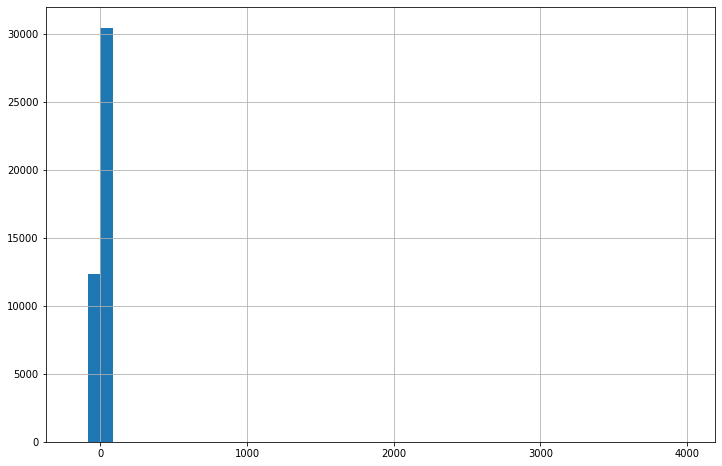

In [82]:
# Distribution of these differences
diff_df.difference.hist(bins= 50, figsize=(12,8));

In [83]:
diff_df.difference.describe()

count   42800.00
mean        4.46
std        25.72
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: difference, dtype: float64

## 8 - Creating categories for products

In [84]:
products_cl = drop_dupli.copy()

In [85]:
product_category_df = products_cl.copy()

In [86]:
product_category_df.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45.00,420.003,0,1230


In [87]:
product_category_df["category"] = ""
product_category_df.head()

,sku,name,desc,price,promo_price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45.00,420.003,0,1230,


In [88]:
product_category_df.loc[product_category_df.desc.str.lower().str.contains("keyboard"), :]

,sku,name,desc,price,promo_price,in_stock,type,category
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,
15,MOS0021,Clearguard Moshi MacBook Pro and Air,Keyboard Protector MacBook Pro 13-inch Retina ...,24.95,249.889,0,13835403,
24,APP0277,Apple Wireless Keyboard Keyboard (OEM) Mac,Ultrathin keyboard Apple Bluetooth Spanish (un...,79.00,759.904,0,13855401,
65,HGD0012,Henge Docks Click keyboard support iMac,Base to hold the Apple Magic TrackPad and Wire...,29.00,269.903,0,8696,
534,LOG0084,Logitech Ultrathin Keyboard Cover Keyboard Cov...,Ultrathin cover and cover with Bluetooth keybo...,89.99,199.892,0,12575403,
793,MOS0105,Moshi Clearguard CS Keyboard Protector,Transparent protective keyboard.,19.99,199.892,0,13835403,
1748,LOG0144,Logitech Keys-To-Go iPad Keyboard Black,Bluetooth wireless mechanical keyboard in Span...,71.99,649.891,0,54025401,
1751,LOG0156,Logitech iPad Keys-To-Go Keyboard Red,Bluetooth wireless mechanical keyboard in Span...,71.99,649.891,0,54025401,
1774,LOG0148,Logitech Type + Keyboard Folio iPad Air 2 Black,Keyboard Case for iPad Air 2.,119.00,109.989,0,12575403,
1814,KEN0200,Kensington KeyFolio Plus X2 Thin Case with bac...,Cover with Spanish backlit keyboard for iPad A...,109.99,69.99,0,12575403,


In [89]:
 # changing the value in the category column to keyboard for all of these keyboard products.
 product_category_df.loc[product_category_df.desc.str.lower().str.contains("keyboard"), "category"] = "keyboard"

In [90]:
# Let's take a look at the effect that had on the `category` column.
product_category_df.category.value_counts()

            4366
keyboard      64
Name: category, dtype: int64

In [91]:
# Category creation using regex
product_category_df.loc[product_category_df.name.str.lower().str.contains("apple iphone"), :]

,sku,name,desc,price,promo_price,in_stock,type,category
36,APP0308,AV Cable Adapter Apple iPhone iPad and iPod white,IPhone iPad iPod adapter and AV cable.,45.00,359.999,0,1230,
1204,APP0832,Apple iPhone 6 Plus Case White,Ultrathin silicone case and microfiber premium.,39.00,389.995,0,11865403,
1205,APP0834,Apple iPhone 6 Plus Case Blue,Ultrathin silicone case and microfiber premium.,39.00,329.894,0,11865403,
1206,APP0835,Apple iPhone 6 Plus Case Rosa,Ultrathin silicone case and microfiber premium.,39.00,389.995,0,11865403,
1207,APP0836,Apple iPhone 6 Plus Case Green,Ultrathin silicone case and microfiber premium.,39.00,389.995,0,11865403,
1208,APP0840,Apple iPhone 6 Plus Leather Case Black,Case premium leather.,49.00,429.913,0,11865403,
1209,APP0841,Apple iPhone 6 Plus Leather Case Red,Case premium leather.,49.00,419.894,0,11865403,
1210,APP0844,Apple iPhone 6 Leather Case Rosa,Leather Case for iPhone 6 premium.,45.00,449.999,0,11865403,
2582,APP1014,Lightning White Apple iPhone Dock,Stand with Lightning Dock Connector and iPhone...,45.00,420.003,0,13615399,
3034,APP1132,Gold Lightning Apple iPhone Dock,Stand with Lightning Dock Connector and iPhone.,59.00,490.002,0,13615399,


In [92]:
# Checking apple iphone with {0,7} in order to include 7 characters after 'apple iphone'.
product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,7}apple iphone"), :]

,sku,name,desc,price,promo_price,in_stock,type,category
1204,APP0832,Apple iPhone 6 Plus Case White,Ultrathin silicone case and microfiber premium.,39.00,389.995,0,11865403,
1205,APP0834,Apple iPhone 6 Plus Case Blue,Ultrathin silicone case and microfiber premium.,39.00,329.894,0,11865403,
1206,APP0835,Apple iPhone 6 Plus Case Rosa,Ultrathin silicone case and microfiber premium.,39.00,389.995,0,11865403,
1207,APP0836,Apple iPhone 6 Plus Case Green,Ultrathin silicone case and microfiber premium.,39.00,389.995,0,11865403,
1208,APP0840,Apple iPhone 6 Plus Leather Case Black,Case premium leather.,49.00,429.913,0,11865403,
1209,APP0841,Apple iPhone 6 Plus Leather Case Red,Case premium leather.,49.00,419.894,0,11865403,
1210,APP0844,Apple iPhone 6 Leather Case Rosa,Leather Case for iPhone 6 premium.,45.00,449.999,0,11865403,
3064,APP1157,Case Apple iPhone 6 Plus / 6s Plus Silicone Ca...,Ultrathin silicone case and microfiber premium...,45.00,420.003,0,11865403,
3065,APP1136,Case Apple iPhone 6 / 6S Leather Case Blue Night,ultrathin leather case and microfiber premium ...,55.00,510.003,0,11865403,
3067,APP1155,Case Apple iPhone 6 Plus / 6s Plus Silicone Ca...,Ultrathin silicone case and microfiber premium...,45.00,420.003,0,11865403,


In [93]:
# Now, creating the categories:
product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,117}keyboard"), "category"] += ", keyboard"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("apple iphone") & 
                         (product_category_df.price > 300)), "category"] += ", smartphone"

product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,7}apple ipod"), "category"] += ", ipod"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("^.{0,7}apple ipad|tablet") & 
                         (product_category_df.price > 200)), "category"] += ", tablets"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("imac|mac mini|mac pro") & 
                         (product_category_df.price > 200)&
                         (~product_category_df.name.str.lower().str.contains("ssd upgrade|ssd expansion |expansion|installation"))), "category"] += ", desktop"

product_category_df.loc[product_category_df.name.str.lower().str.contains("clean"), "category"] = "cleaning_products"

product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,35}mouse"), "category"] += ", mouse"
product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,135}virtual"), "category"] += ", VR sets"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("head|earpods") & 
                        (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", headphones"

product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,7}apple watch"), "category"] += ", apple watches"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("^.{0,17}support|stand") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", supports & stands"

product_category_df.loc[product_category_df.name.str.lower().str.contains("memory"), "category"] += ", RAMs"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("repair") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", repairs"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("charger|dock|usb|adapter") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", chargers & adapters"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("case|backpack") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", cases & backpacks"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("monitor") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", monitors"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("magsafe") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", chargers & adapters"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("hdmi") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", chargers & adapters"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("apple macbook") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", laptops"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("camera") & 
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", cameras"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("^.{0,27}cable") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", chargers & adapters"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("hard drive") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", storage"


product_category_df.loc[(product_category_df.name.str.lower().str.contains("strap") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", straps"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("battery") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", batteries"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("tablet") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", tablets"

product_category_df.loc[(product_category_df.name.str.lower().str.contains("watch") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ", watches"

product_category_df.loc[(~product_category_df.category.str.lower().str.contains(" ") & 
                         (product_category_df.price > 1000) & 
                         (~product_category_df.name.str.lower().str.contains("Wacom"))), "category"] += ', storage'

product_category_df.loc[(product_category_df.name.str.lower().str.contains("wacom") &
                         (~product_category_df.category.str.lower().str.contains(" "))&
                         (product_category_df.price > 100)), "category"] += ', tablets'

product_category_df.loc[(product_category_df.name.str.lower().str.contains("sound") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ', sound'

product_category_df.loc[(product_category_df.name.str.lower().str.contains("screen") &
                         (~product_category_df.category.str.lower().str.contains(" |_"))), "category"] += ', screen accesories'

product_category_df.loc[(product_category_df.name.str.lower().str.contains("iphone") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ', iphone accessories'

product_category_df.loc[(product_category_df.name.str.lower().str.contains("samsung") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ', samsung'

product_category_df.loc[(product_category_df.name.str.lower().str.contains("ssd") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ', storage'

product_category_df.loc[(product_category_df.name.str.lower().str.contains("") &
                         (~product_category_df.category.str.lower().str.contains(" "))), "category"] += ', other'

In [94]:
# Checking how many products in each created category:
product_category_df.category.value_counts()

, cases & backpacks         1256
, chargers & adapters        715
, other                      576
, desktop                    437
, iphone accessories         231
, laptops                    192
, monitors                   161
, smartphone                 140
, batteries                  115
, tablets                    109
, supports & stands           99
, screen accesories           65
, straps                      64
keyboard, keyboard            62
, ipod                        42
, storage                     34
, sound                       29
, watches                     23
, mouse                       21
, cameras                     16
, repairs                     12
cleaning_products, other       6
, keyboard                     6
, headphones                   6
, samsung                      4
, RAMs                         4
, apple watches                3
keyboard, other                1
, VR sets                      1
Name: category, dtype: int64

In [95]:
# Getting rid of the commas in categories:
product_category_df_commas = product_category_df.replace(', ','', regex=True)

In [97]:
product_category_df_commas.category.value_counts()

cases & backpacks         1256
chargers & adapters        715
other                      576
desktop                    437
iphone accessories         231
laptops                    192
monitors                   161
smartphone                 140
batteries                  115
tablets                    109
supports & stands           99
screen accesories           65
straps                      64
keyboardkeyboard            62
ipod                        42
storage                     34
sound                       29
watches                     23
mouse                       21
cameras                     16
repairs                     12
cleaning_productsother       6
keyboard                     6
headphones                   6
samsung                      4
RAMs                         4
apple watches                3
keyboardother                1
VR sets                      1
Name: category, dtype: int64

In [100]:
product_category_df_commas.head()

,sku,name,desc,price,promo_price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,supports & stands
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,keyboardkeyboard
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,mouse
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,chargers & adapters
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45.00,420.003,0,1230,chargers & adapters


## 9 - Data exploration

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

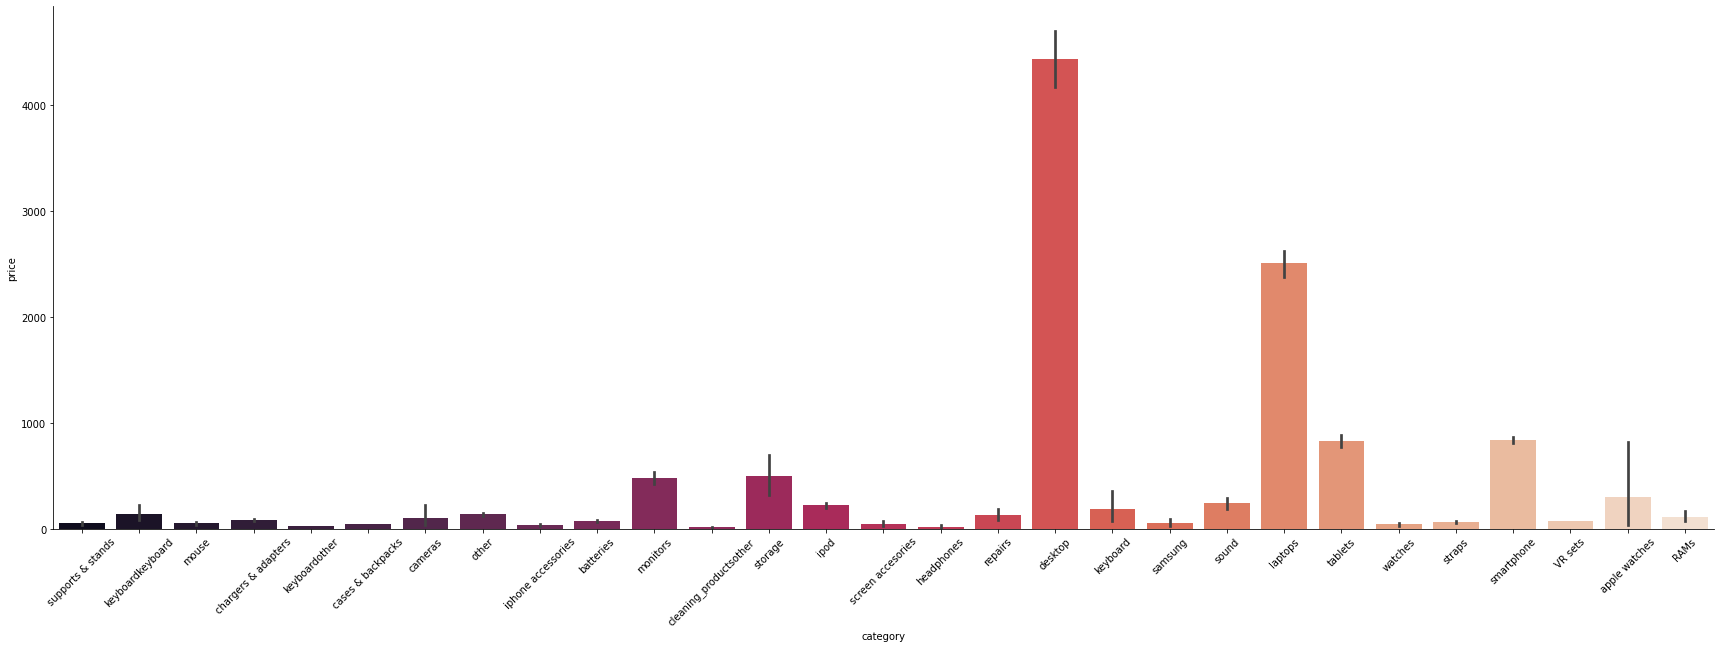

In [99]:
# Checking which category has the most accumulated values:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(kind="bar",
            data=product_category_df_commas,
            x="category",
            y="price",
            height=8,
            aspect=3,
            palette="rocket"
            );
plt.xticks(rotation=45)

In [101]:
# checking the top 10 brands:
ol_df = orderlines_qu.copy()

In [102]:
ol_df["short"] = ol_df["sku"].str[:3]

In [103]:
# Merging dataframes
# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [104]:
ol_with_brands_df = ol_df.merge(brands, 
                                how="left", 
                                on="short")
ol_with_brands_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple


In [105]:
brands_10_most_sold_df = (
                         ol_with_brands_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

,long,product_quantity
5,Apple,11631
100,OWC,4015
162,Western Digital,2485
20,Crucial,2420
9,Belkin,2369
68,LaCie,2178
107,Pack,1986
129,Satechi,1901
161,Wacom,1870
92,NewerTech,1733


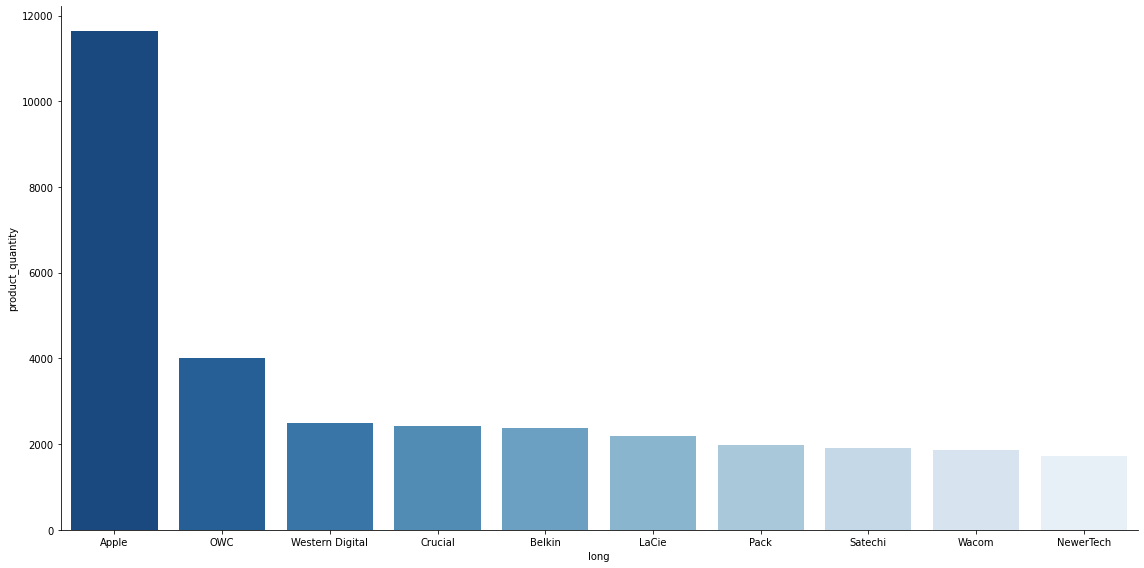

In [106]:
# Showing graphically:
sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="long",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="Blues_r");

In [107]:
# Creating a scatter plot to explore the relationship between the recommended price for a product 
# (products.price) and the price that products actually sold for (final_merged_orders_orderlines_df.ol_unit_price)

ol_df = orderlines_qu.copy()

In [108]:
ol_with_products_df = ol_df.merge(products_cl, 
                                  how="left", 
                                  on="sku")

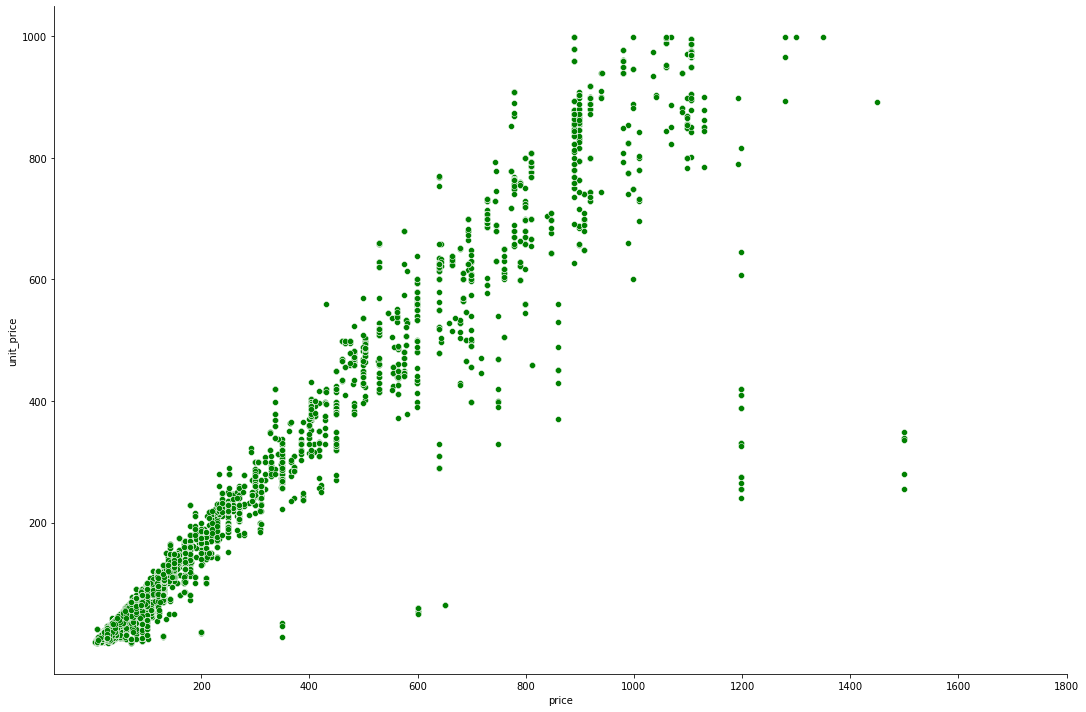

In [109]:
sns.relplot(data=ol_with_products_df,
           x="price",
           y="unit_price",
           height=10,
           aspect=1.5,
           color="g");

plt.xticks([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]);
plt.yticks([200, 400, 600, 800, 1000]);

In [110]:
# The scattered plot will make more sense with a color code to see the differences:
ol_with_products_df["higher_same_lower"] = "same price"
ol_with_products_df.loc[ol_with_products_df["unit_price"] > ol_with_products_df["price"], "higher_same_lower"] = "higher price"
ol_with_products_df.loc[ol_with_products_df["unit_price"] < ol_with_products_df["price"], "higher_same_lower"] = "lower price"

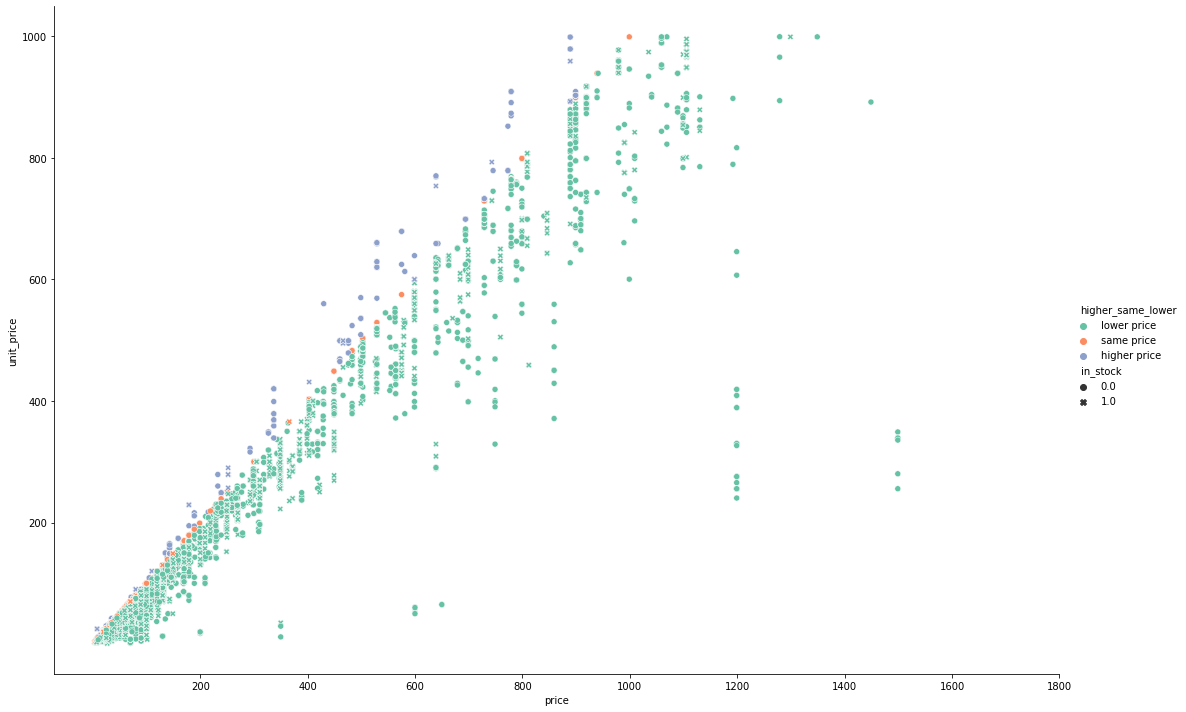

In [111]:
sns.relplot(data=ol_with_products_df,
           x="price",
           y="unit_price",
           hue="higher_same_lower",
           style="in_stock",
           height=10,
           aspect=1.5,
           palette="Set2");

plt.xticks([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]);
plt.yticks([200, 400, 600, 800, 1000]);

In [112]:
# Checking to see the which products were sold the most in January 2017 and January 2018:
ol_df = orderlines_qu.copy()

In [113]:
ol_df["date"] = pd.to_datetime(ol_df["date"])

In [114]:
january_df = ol_df.loc[ol_df["date"].dt.month == 1, :].copy()

In [115]:
january_df["year"] = january_df["date"].dt.year

In [116]:
top_10_2_years_df = (
                    january_df
                    .groupby(["year", "sku"], as_index=False)
                    ["product_quantity"]
                    .sum()
                    .sort_values(by=["year", "product_quantity"], ascending=False)
                    .groupby("year").head(10)
                    )

In [117]:
top_10_2_years_names_df = top_10_2_years_df.merge(products_cl, 
                                                  how="left", 
                                                  on="sku")

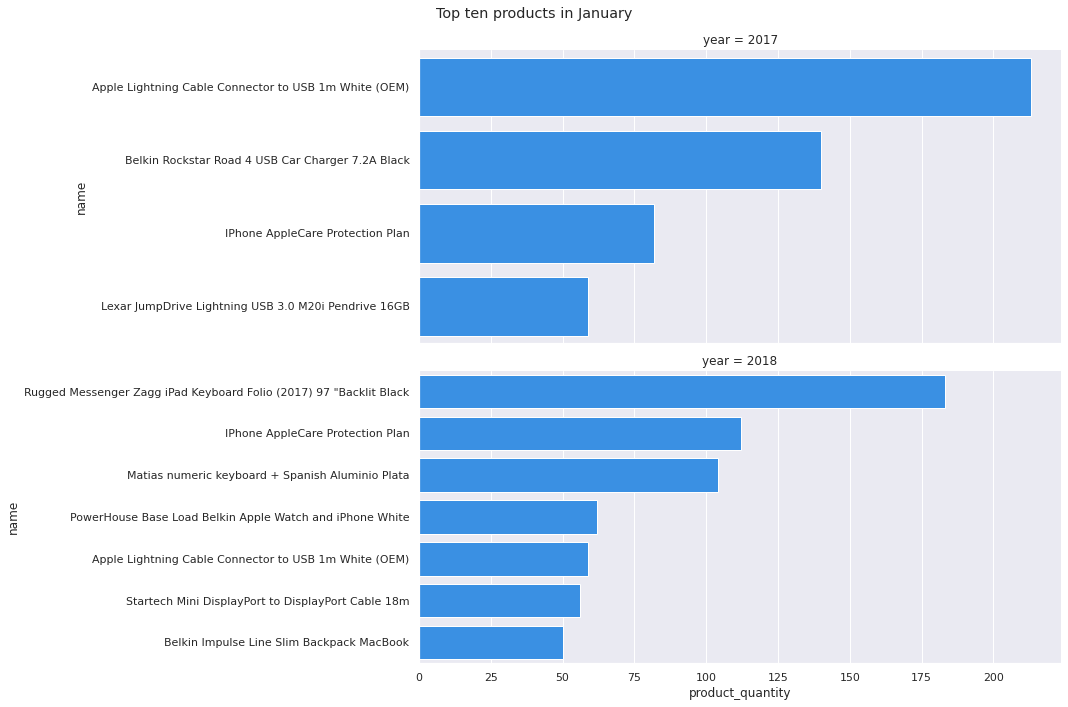

In [118]:
sns.set(font_scale=1)

(
sns.catplot(kind="bar", 
            data=top_10_2_years_names_df, 
            x="product_quantity", 
            y="name", 
            row="year", 
            color="dodgerblue",
            aspect=3,
            sharey=False)
    .figure.suptitle("Top ten products in January")
    .figure.subplots_adjust(top=.92)
)